In [1]:
%matplotlib inline
import pdb


# RBF SVM parameters


`gamma` -> 	similar to `1/(radius of influence)`. Essentially a lower `gamma` the more generalized the SVM will be likely being drawn between the two densities with weight.

`C` -> 		Tradeoff for the correct classification. A higher `C` will wrap more closely around the actual SVM. 

A lower `C` will allow for a larger margin, making for a simpler function, at the cost of accuracy.




In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target



Automatically created module for IPython interactive environment


## Print the Array Information to See this Stuff

In [3]:
print(type (iris))
print(type(X), type(y))
print(X)
print(X[:,1])
print(X.shape)
print(X.size)
print(y)
print(y.shape)
print(y.size)

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 

In [4]:
# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

#The x features are: Sepal Length, Sepal Width, Petal Length and Petal Width
#I assume the y features are: Setosa, Versicolour, and Virginica, and we only
#want to classify by Versicolour and Verginica?

X_2d = X[:, :2]
print(X_2d[0, :]) # Expecting [5.1 3.5]
print(X_2d.shape) # Expecting (150, 2)
X_2d = X_2d[y > 0]  #Expecting # Expecting (150, 2)
print(y)
y_2d = y[y > 0]  # Not sure why we only want y>0. Assuming classification by only Versicolour & Verginica
print(y_2d.shape) 
y_2d -= 1        # Expecting Element-Wise Operation
print(y_2d)



[5.1 3.5]
(150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

# Doing this includes your verification set settings within your model
# NO!

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

print(X.shape)
print(X_2d.shape)


(150, 4)
(100, 2)


### Cross-Validation

See https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [6]:
# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

# Create a set of points, starting at -2, ending at 10, with 13 points
C_range = np.logspace(-2, 10, 13)
print(C_range)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07
 1.e+08 1.e+09 1.e+10]


In [7]:
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)


# Split into a test_sets and a training_sets
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# GridSearchCV will search the parameter space for the best parameters to use, minimizing the score function
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


In [8]:
print(X_2d.shape)
print(y_2d.shape)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))
print(type(X_2d))
print(type(y_2d))

(100, 2)
(100,)
(150, 4)
(150,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## I'm curious to see what happens if we do it on our Modified Set

And I have no idea why this actually doesn't work...

In [ ]:
# gamma_range = np.logspace(-9, 3, 13)
# param_grid = dict(gamma=gamma_range, C=C_range)


# # GridSearchCV will search the parameter space for the best parameters to use, minimizing the score function
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# pdb.set_trace()

# grid.fit(X_2d, y_2d)

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))


In [21]:
# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:        
        clf = SVC(C=C, gamma=gamma)
        print(type(clf))
        print(clf)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))
        

<class 'sklearn.svm.classes.SVC'>
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
<class 'sklearn.svm.classes.SVC'>
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
<class 'sklearn.svm.classes.SVC'>
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
<class 'sklearn.svm.classes.SVC'>
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  to

In [20]:
# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
print(xx, xx.size, xx.shape)
print(yy, yy.size, yy.shape)


[[-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 ...
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]
 [-3.         -2.96984925 -2.93969849 ...  2.93969849  2.96984925
   3.        ]] 40000 (200, 200)
[[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.96984925 -2.96984925 -2.96984925 ... -2.96984925 -2.96984925
  -2.96984925]
 [-2.93969849 -2.93969849 -2.93969849 ... -2.93969849 -2.93969849
  -2.93969849]
 ...
 [ 2.93969849  2.93969849  2.93969849 ...  2.93969849  2.93969849
   2.93969849]
 [ 2.96984925  2.96984925  2.96984925 ...  2.96984925  2.96984925
   2.96984925]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]] 40000 (200, 200

<Figure size 576x432 with 0 Axes>

(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)
(40000,)
(200, 200)


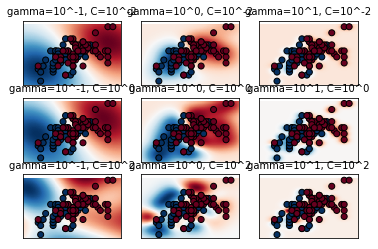

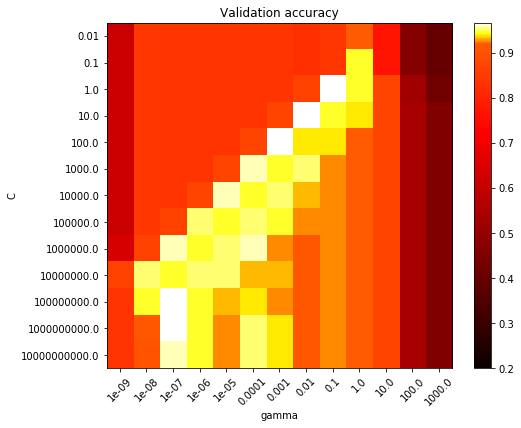

In [24]:
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    # .ravel() -> Return a contiguous flattened array.
    print(xx.ravel().shape)
    print(xx.shape)
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()